# Travelling Saleman Problem -- A Genetic Algorithmic Approach

In [2]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

In [3]:
class CitiesMap:
    """Euclidean map of random city locations."""
    def __init__(self, *, seed: int, num_cities: int, map_size: tuple[int, int]):
        self.seed = seed
        self.num_cities = num_cities
        self.map_size = map_size

        random.seed(self.seed)
        self.cities = [(random.random() * map_size[0], random.random() * map_size[1]) for i in range(num_cities)]

    def __str__(self) -> str:
        return ''.join([f'{city}' for city in self.cities])

    def __getitem__(self, index) -> tuple[float, float]:
        return self.cities[index]

    def __len__(self) -> int:
        return len(self.cities)

    def inter_dist(self, a: int, b: int) -> float:
        """Inter-distance between two cities by index."""
        return math.sqrt((self.cities[a][0] - self.cities[b][0])**2 
                         + (self.cities[a][1] - self.cities[b][1])**2)
        
    def plot(self) -> PathCollection:
        """Return plot of cities"""
        plt.scatter([x for x, y in self.cities], [y for x, y in self.cities])
        plt.xlim([0, self.map_size[0]])
        plt.ylim([0, self.map_size[1]])
        return plt

In [4]:
def loop(lst) -> []:
    """Return a looped list of paths to travel."""
    loop_lst = []
    for i, j in zip(lst, lst[1:]):
        loop_lst.append((i, j))
    loop_lst.append((lst[-1], lst[0]))
    return loop_lst

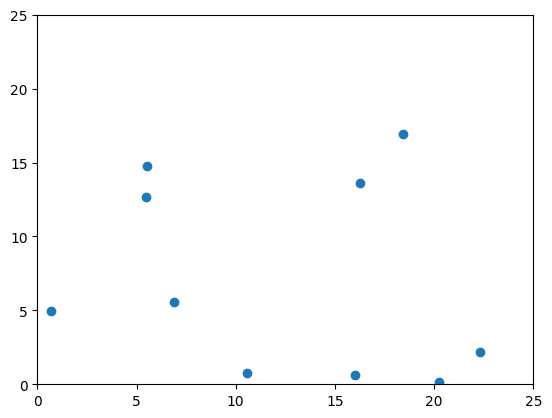

In [5]:
cm = CitiesMap(seed=42, num_cities=10, map_size=(25, 25))
cm.plot().show()

In [6]:
class TSM:
    """Taveling Salesman Agent."""
    def __init__(self, cities_map: CitiesMap):
        self.map = cities_map
        self.DNA = [i for i in range(self.map.num_cities)]
        random.shuffle(self.DNA)

    def dist(self) -> float:
        """Return total distance traveled."""
        return sum([self.map.inter_dist(i, j) for i, j in loop(self.DNA)])
    
    def plot(self) -> PathCollection:
        """Return plot of path traveled."""
        p = self.map.plot()
        for i, j in loop(self.DNA):
            ax, ay = self.map[i]
            bx, by = self.map[j]
            p.plot([ax, bx], [ay, by])

    def mutate(self, mutation_rate=0.02) -> None:
        if random.random() <= mutation_rate:
            samples = random.sample(range(len(self.map)), 2)
            self.DNA[samples[0]], self.DNA[samples[1]] = self.DNA[samples[1]], self.DNA[samples[0]]

    def cross_breed(self, other) -> 'TSM':
        ...

In [7]:
tsm = TSM(cm)

In [8]:
tsm.DNA

[4, 3, 0, 8, 7, 1, 9, 5, 6, 2]

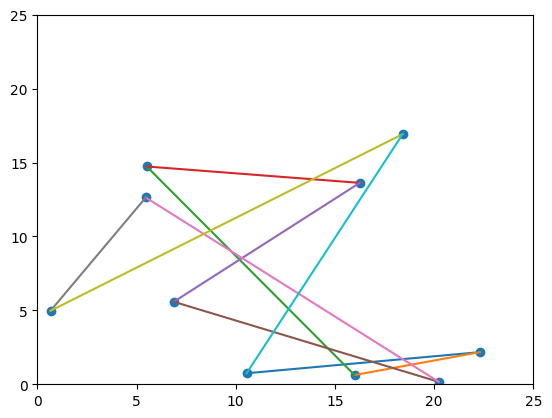

In [9]:
tsm.plot()

In [10]:
tsm.dist()

141.2303543090889